# Data Augmentation

In [3]:
from imblearn.over_sampling import SMOTEN, ADASYN
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
file_path = "../data/CRFs.csv"
df = pd.read_csv(file_path)
df = df.replace("n/a", np.nan).dropna()

In [6]:
df['Gender'] = df['Gender'].str.upper()

In [7]:
continuous_cols = ['Age','Weight','Height','SBP','DBP']
categorical_cols = ['Smoker', 'Gender']
target_col = 'Vascular event'

In [8]:
X = df.drop(columns=[target_col])
y = df[target_col]

In [9]:
scaler = StandardScaler()
X_cont_scaled = scaler.fit_transform(X[continuous_cols])
X_cont_scaled = pd.DataFrame(X_cont_scaled, columns=continuous_cols)

In [15]:
encoder = OrdinalEncoder()
X_cat_encoded = encoder.fit_transform(X[categorical_cols])
X_cat_encoded = pd.DataFrame(X_cat_encoded, columns=categorical_cols)

In [11]:
X_cont_scaled.head()

,Age,Weight,Height,SBP,DBP
0,-2.221466,2.194940,1.746673,0.131399,0.485540
1,1.138972,0.176409,-0.359956,1.950732,-0.071100
2,0.718917,0.822339,1.465789,0.131399,1.042181
3,-0.821283,0.176409,0.904021,-1.343736,-1.184381
4,1.699045,-0.469520,0.342253,-0.852025,-0.627741


In [16]:
X_cat_encoded.head()

,Smoker,Gender
0,1.0,1.0
1,0.0,0.0
2,0.0,1.0
3,0.0,0.0
4,0.0,1.0


In [27]:
print("Original class distribution:")
print(pd.Series(y).value_counts())

Original class distribution:
Vascular event
none                     104
myocardial infarction      9
stroke                     3
syncope                    3
Name: count, dtype: int64


In [ ]:
adasyn = ADASYN(sampling_strategy='not majority',
                n_neighbors=2, random_state=42)
X_cont_res, y_cont_res = adasyn.fit_resample(X_cont_scaled, y)
vals = pd.Series(y_cont_res).value_counts()
smote_oversample = {
    'myocardial infarction':vals.values[0],
    'stroke':vals.stroke,
    'syncope':vals.syncope,
    'none':vals.none
}
smoten = SMOTEN(sampling_strategy=smote_oversample,
                k_neighbors=2, random_state=42)
X_cat_res, y_cat_res = smoten.fit_resample(X_cat_encoded, y)

print("After ADASYN (continuous features):")
print(pd.Series(y_cont_res).value_counts())

After ADASYN (continuous features):
Vascular event
myocardial infarction    108
stroke                   105
syncope                  105
none                     104
Name: count, dtype: int64


In [29]:
vals = pd.Series(y_cont_res).value_counts()
smote_oversample = {
    'myocardial infarction':vals.values[0],
    'stroke':vals.stroke,
    'syncope':vals.syncope,
    'none':vals.none
}

In [30]:
smoten = SMOTEN(sampling_strategy=smote_oversample,k_neighbors=2, random_state=42)
X_cat_res, y_cat_res = smoten.fit_resample(X_cat_encoded, y)

print("After SMOTEN (categorical features):")
print(pd.Series(y_cat_res).value_counts())

After SMOTEN (categorical features):
Vascular event
myocardial infarction    108
stroke                   105
syncope                  105
none                     104
Name: count, dtype: int64


In [31]:
if np.array_equal(y_cont_res, y_cat_res):
    X_res = pd.concat([X_cont_res.reset_index(drop=True),
                       X_cat_res.reset_index(drop=True)], axis=1)
    y_res = y_cont_res.reset_index(drop=True)
else:
    X_res = pd.concat([X_cont_res.reset_index(drop=True),
                       X_cat_res.reset_index(drop=True)], axis=1)
    y_res = y_cont_res.reset_index(drop=True)

In [32]:
X_res.head()

,Age,Weight,Height,SBP,DBP,Smoker,Gender
0,-2.221466,2.194940,1.746673,0.131399,0.485540,1.0,1.0
1,1.138972,0.176409,-0.359956,1.950732,-0.071100,0.0,0.0
2,0.718917,0.822339,1.465789,0.131399,1.042181,0.0,1.0
3,-0.821283,0.176409,0.904021,-1.343736,-1.184381,0.0,0.0
4,1.699045,-0.469520,0.342253,-0.852025,-0.627741,0.0,1.0


In [33]:
y_res.head()

0    none
1    none
2    none
3    none
4    none
Name: Vascular event, dtype: object

In [34]:
augmented_data = pd.concat([X_res, y_res], axis=1)
augmented_data.head()

,Age,Weight,Height,SBP,DBP,Smoker,Gender,Vascular event
0,-2.221466,2.194940,1.746673,0.131399,0.485540,1.0,1.0,none
1,1.138972,0.176409,-0.359956,1.950732,-0.071100,0.0,0.0,none
2,0.718917,0.822339,1.465789,0.131399,1.042181,0.0,1.0,none
3,-0.821283,0.176409,0.904021,-1.343736,-1.184381,0.0,0.0,none
4,1.699045,-0.469520,0.342253,-0.852025,-0.627741,0.0,1.0,none


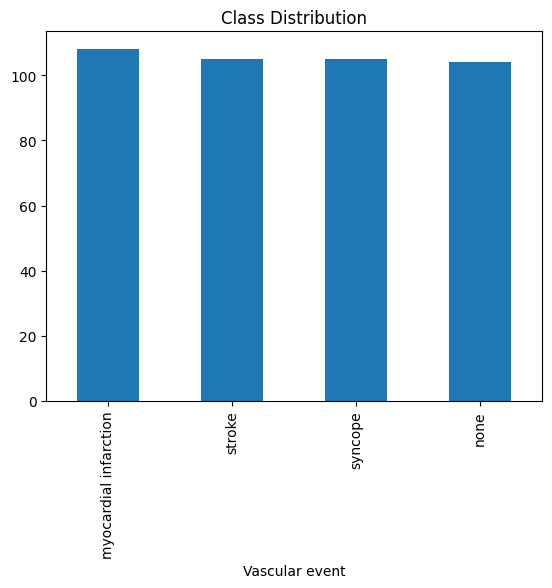

In [35]:
augmented_data['Vascular event'].value_counts().plot(kind='bar', title='Class Distribution')
plt.show()

In [36]:
augmented_data.to_csv("augmented_dataset.csv", index=False)